In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Continuous Random Variables

### Probablity Density Functions (PDF)
Does not give probabilities directly, rather it builds a probability model based upon distribution of continuous random variables

$f_x$(x) <- Density Function, not a probability

Properties:
1. $f_x$(x) >= 0
2. $f_x$(x) may be larger than 1, where as PMF(x=a) <= 1
3. The summation of the area under the distribution area must be less one

### Uniform Distribution
Results in horizontal line for all values between variable range, each point has the same density value

**Property Density Function**

$f_x$(x) = { 1/(b-a) when a < b and a<x<=b,   
                otherwise 0

<AxesSubplot:ylabel='Density'>

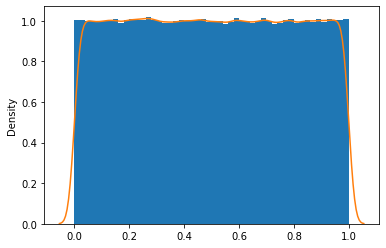

In [2]:
# Example:
X = np.random.rand(1000000)

plt.hist(X, density=True, bins=50)
sns.kdeplot(X)

<AxesSubplot:ylabel='Density'>

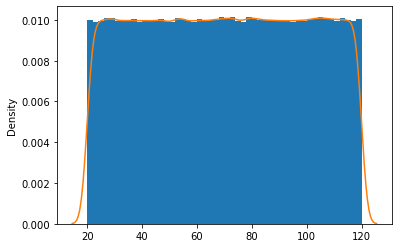

In [3]:
# Example to retrive between a range of 20 and 120
X = 100*np.random.rand(1000000) + 20

plt.hist(X, density=True, bins=50)
sns.kdeplot(X)

### Exponential Distribution

X >= 0 and continuous  
$\lambda$ must always be greater than zero, often can reflect on rates of an event, like customers entering a store on average once every 10 mins.

**Proper Density Function**

$f_x$(x;$\lambda$) = { $\lambda$*e^(-$\lambda$*x) when x >= 0 and $\lambda$ >= 0  
                                   0 otherwise

Note:  larger $\lambda$ values result in a steeper rate of decay

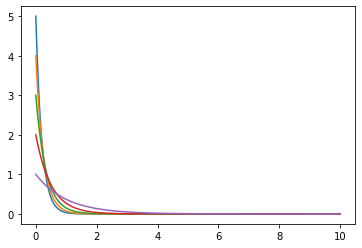

In [4]:
# Example
X = np.linspace(0,10,1000)
lmda = 5

for i in range(5):
    f_x = lmda*np.exp(-lmda*X)
    plt.plot(X, f_x, label=str(lmda))
    lmda-=1

### Gaussian (aka - Normal) Distribution

Symmetric Bell Curve

-$\infty$ <= X <= $\infty$

**Probability Density Function**

$f_x$(x; $\sigma$; $\mu$) = { (1 / ($sqrt(2pi)$ * $\sigma$)) * euler^( (-(x-$\mu$)^2) / (2*$\sigma$)^2 )  
- -$\infty$ <= x <= $\infty$  
- $\sigma$ = rate of density decay, higher sigma means steeper slope  
- $\mu$ = maximum density value of the curve  

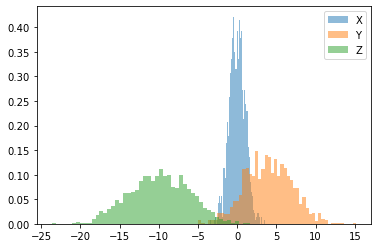

In [5]:
# Shows a couple Gaussian/Normal distribution curves
X = np.random.normal(0,1,1000)
Y = np.random.normal(4,3,1000)
Z = np.random.normal(-10, 4, 1000)

plt.hist(X, density=True, alpha=0.5, label='X', bins=50)
plt.hist(Y, density=True, alpha=0.5, label='Y', bins=50)
plt.hist(Z, density=True, alpha=0.5, label='Z', bins=50)

plt.legend()

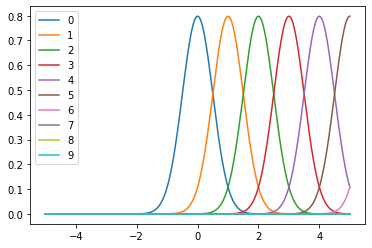

In [6]:
# Shows the effect of changing mu, which shifts the center of the distribution curve along the x-axis
X = np.linspace(-5,5,1000)

sigma = 0.5
mu_range = range(10)

for i in mu_range: 
    mu = i
    f_x = np.exp((-(X-mu)**2)/(2*(sigma**2)))/((2*np.pi*(sigma**2))**0.5)
    plt.plot(X, f_x, label=str(mu))

plt.legend()

<ipython-input-7-997206b93f4d>:9: RuntimeWarning: divide by zero encountered in true_divide
  f_x = np.exp((-(X-mu)**2)/(2*(sigma**2)))/((2*np.pi*(sigma**2))**0.5)
<ipython-input-7-997206b93f4d>:9: RuntimeWarning: invalid value encountered in true_divide
  f_x = np.exp((-(X-mu)**2)/(2*(sigma**2)))/((2*np.pi*(sigma**2))**0.5)


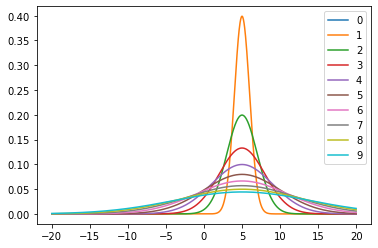

In [7]:
# Shows the effect of changing sigma, which produces steeper decay distribution curves
X = np.linspace(-20,20,1000)

sigma_range = range(10)
mu = 5

for i in sigma_range: 
    sigma = i
    f_x = np.exp((-(X-mu)**2)/(2*(sigma**2)))/((2*np.pi*(sigma**2))**0.5)
    plt.plot(X, f_x, label=str(sigma))

plt.legend()

### Cumulative Distribution Function (CDF)  
the cumulative distribution function (CDF) of a real-valued random variable **X**, or just distribution function of **X**, evaluated at **x**, is the probability that **X** will take a value less than or equal to **x**  

** Probability Density Formula **  
$F_x$(x) = P(X <= x)  

Thus, $F_x$(x) would be the y-value for a given x 

The probability X lies within an interval (a,b] therefore is:  

P(a < X < b) = $F_x$(b) - $F_x$(a) where a < b 

In the above, X is itself a distribution like binomial,gaussian, etc, etc

## Transformation of  Continuous Random Variables
Given the expirement is rolling a 6-sided die:

x represents the number shown after a die roll, in other words:

x $\in$ {1,2,3,4,5,6}  

and given a uniform discrete distribution ( ie - die is properly fair)

$P_x$(x = i) = 1/6

and given y = $x^2$

y $\in$ {1,4,9,16,25, 36}

then 

$P_x$(x=i) == $P_y$(y=i) == 1/6

The goal of ML is to identify the distributions (rather than assume a distribution) and take those random variables to define features used to built the probability model (working back from the data)